Assumptions:
1. Company employee and followers count don't impact job salary
2. Job remote option impacts job salary which can be related to specific job type
3. Location of work, job type and experience level should have significant impact on job salary
4. Sponsored job posts are mostly posted by bigger companies
6. Views depends on the job salary, type and company followers
7. Job benefits in description should have impact on job salary
8. Supervision positions should have higher salary

In [626]:
import pandas as pd

jobs_df = pd.read_csv('data/LinkedInJobs_MLDataset.csv')

jobs_df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


In [627]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
jobs_df.describe()

,Emp_Cnt,Flw_Cnt,max_sal,med_sal,min_sal,is_remote,views,is_sponsored,base_comp
count,33246.00,33246.00,33246.00,33246.00,33246.00,33246.00,33246.00,33246.00,33246.00
mean,15484.56,523436.39,31866.15,27494.95,23123.76,0.14,45.42,0.24,0.40
std,62180.95,2708735.72,68238.53,57905.64,48977.38,0.35,126.97,0.43,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,148.00,8135.75,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,1235.00,37996.50,0.00,0.00,0.00,0.00,7.00,0.00,0.00
75%,8160.00,168036.00,97.97,90.00,84.78,0.00,38.00,0.00,1.00
max,829111.00,31887198.00,1300000.00,1050000.00,998426.00,1.00,5656.00,1.00,1.00


More than 50% of the job posts haven't mentioned the salary. 14% jobs are remote and 24% of job posts are sponsored.

In [628]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Co_Nm            33242 non-null  object 
 1   Co_Pg_Lstd       33246 non-null  bool   
 2   Emp_Cnt          33246 non-null  int64  
 3   Flw_Cnt          33246 non-null  int64  
 4   Job_Ttl          33246 non-null  object 
 5   Job_Desc         33244 non-null  object 
 6   Is_Supvsr        33246 non-null  bool   
 7   max_sal          33246 non-null  float64
 8   med_sal          33246 non-null  float64
 9   min_sal          33246 non-null  float64
 10  py_prd           33246 non-null  object 
 11  py_lstd          33246 non-null  bool   
 12  wrk_typ          33246 non-null  object 
 13  loc              33246 non-null  object 
 14  st_code          33246 non-null  object 
 15  is_remote        33246 non-null  int64  
 16  views            33246 non-null  int64  
 17  app_typ     

**domain** - has a lot of missing values and it will be hard to use it. We will drop it.

In [629]:
print('Number of companies: ', len(jobs_df['Co_Nm'].unique()))
print('Number of job titles: ', len(jobs_df['Job_Ttl'].unique()))
print('Number of job locations: ', len(jobs_df['loc'].unique()))
print('Payment periods: ', jobs_df['py_prd'].unique())
print('Work types: ', jobs_df['wrk_typ'].unique())
print('Job state codes: ', jobs_df['st_code'].unique())
print("Application types: ", jobs_df['app_typ'].unique())
print("Experience levels: ", jobs_df['xp_lvl'].unique())
print("Number of job state codes: ", len(jobs_df['st_code'].unique()),'\n')
print(f"Data collumns: {jobs_df.columns.unique()}")

Number of companies:  11268
Number of job titles:  22290
Number of job locations:  4621
Payment periods:  ['MONTHLY' 'Not Listed' 'HOURLY' 'YEARLY' 'Unpaid' 'WEEKLY' 'ONCE']
Work types:  ['Full-time' 'Contract' 'Other' 'Part-time' 'Internship' 'Temporary'
 'Volunteer']
Job state codes:  ['SC' 'WI' 'AL' 'CA' 'XF' 'IL' 'CT' 'FL' 'NJ' 'IN' 'NC' 'NV' 'ID' 'OR'
 'CO' 'TN' 'VA' 'OH' 'TX' 'MI' 'IA' 'PA' 'MO' 'NY' 'WA' 'MD' 'KY' 'SD'
 'AZ' 'GA' 'NE' 'MN' 'MS' 'LA' 'UT' 'NM' 'DE' 'RI' 'DC' 'MA' 'OK' 'NH'
 'AR' 'HI' 'VT' 'KS' 'ND' 'AK' 'ME' 'WY' 'WV' 'MT' 'QC']
Application types:  ['OffsiteApply' 'ComplexOnsiteApply' 'SimpleOnsiteApply']
Experience levels:  ['Entry level' 'Not Listed' 'Mid-Senior level' 'Associate' 'Director'
 'Executive' 'Internship']
Number of job state codes:  53 

Data collumns: Index(['Co_Nm', 'Co_Pg_Lstd', 'Emp_Cnt', 'Flw_Cnt', 'Job_Ttl', 'Job_Desc',
       'Is_Supvsr', 'max_sal', 'med_sal', 'min_sal', 'py_prd', 'py_lstd',
       'wrk_typ', 'loc', 'st_code', 'is_remote', '

It seems that job posts are only from US and job state codes refers to US states.

In [630]:
import data_preprocessing as dp


jobs_with_salary_df = jobs_df[jobs_df['med_sal'] > 0]


states = jobs_with_salary_df['st_code'].unique()

jobs_with_salary_df_filtered = jobs_with_salary_df[jobs_with_salary_df['py_lstd'] == True]

for col in ['min_sal', 'med_sal', 'max_sal']:
    jobs_with_salary_df_filtered[col] = jobs_with_salary_df_filtered.apply(lambda row: dp.convert_to_yearly(row[col], row['py_prd']), axis=1)

# Remove outliers
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['med_sal'] < 0.1e8]

jobs_with_salary_df.describe()

,Emp_Cnt,Flw_Cnt,max_sal,med_sal,min_sal,is_remote,views,is_sponsored,base_comp
count,13350.00,13350.00,13350.00,13350.00,13350.00,13350.00,13350.00,13350.00,13350.00
mean,16747.71,783147.94,79357.45,68471.71,57585.96,0.16,54.98,0.26,1.00
std,68246.44,3670981.52,88474.26,74462.57,63161.38,0.36,144.68,0.44,0.00
min,0.00,0.00,10.00,10.00,7.25,0.00,0.00,0.00,1.00
25%,138.00,9316.00,35.00,32.00,29.22,0.00,1.00,0.00,1.00
50%,1235.00,50787.50,70000.00,63000.00,55000.00,0.00,11.00,0.00,1.00
75%,9055.00,231890.75,130000.00,112500.00,93712.50,0.00,48.00,1.00,1.00
max,829111.00,31887198.00,1300000.00,1050000.00,998426.00,1.00,5656.00,1.00,1.00


Removing outliers from salary column was used to improve the model performance. There were few job posts with salary more than 1 million dollars. It is not realistic and it is hard to predict such values. That kind of jobs are not common and it is better to remove them.  

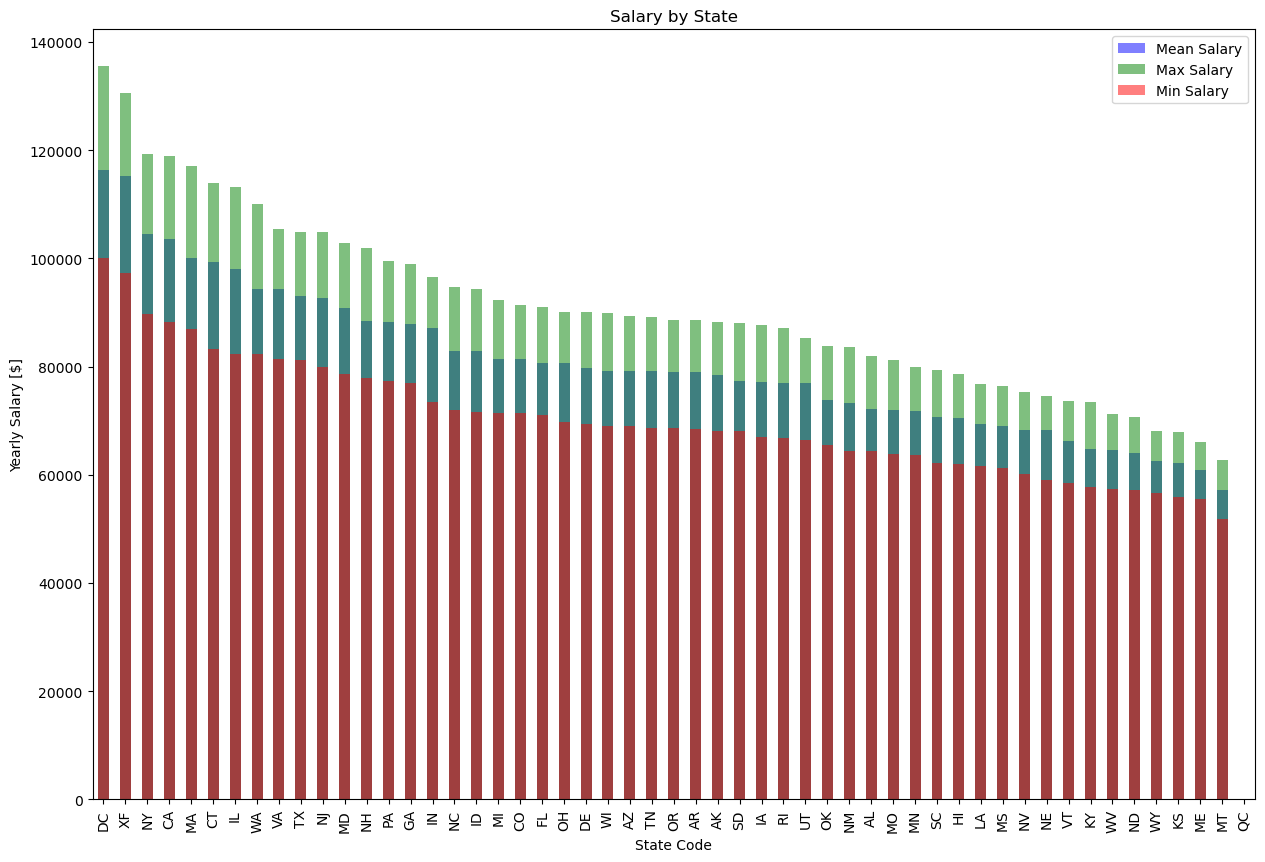

In [631]:
import matplotlib.pyplot as plt

mean_salary = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'].isin(states)].groupby('st_code')['med_sal'].mean()
max_salary = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'].isin(states)].groupby('st_code')['max_sal'].mean()
min_salary = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'].isin(states)].groupby('st_code')['min_sal'].mean()

plt.figure(figsize=(15, 10))

mean_salary.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.5, label='Mean Salary')
max_salary.sort_values(ascending=False).plot(kind='bar', color='green', alpha=0.5, label='Max Salary')
min_salary.sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.5, label='Min Salary')

plt.xlabel('State Code')
plt.ylabel('Yearly Salary [$]')
plt.title('Salary by State')

plt.legend()

plt.show()

We definitely see huge spike of salaries for 3 states. CA, IL and CO. We will try to find out why.

In [632]:
# Function to plot boolean feature by state
def plot_remote_jobs_by_state(jobs_df, bool_feature = 'is_remote', treshold=None):
    counts = jobs_df.groupby(['st_code', bool_feature]).size().unstack()
    counts['total'] = counts.sum(axis=1)

    if treshold is not None and isinstance(treshold, int):
        filtered_counts = counts[counts['total'] < treshold].copy()
    else:
        filtered_counts = counts.copy()

    filtered_counts.sort_values(by='total', ascending=False, inplace=True)

    del filtered_counts['total']
    filtered_counts.plot(kind='bar', stacked=True, figsize=(15, 10))

    plt.xlabel('State Code')
    plt.ylabel('Number of Jobs')
    plt.title(f'Number of {bool_feature} Jobs by State')

    plt.legend([f'Non-{bool_feature}', f'{bool_feature}'], loc='upper right')
    plt.show()

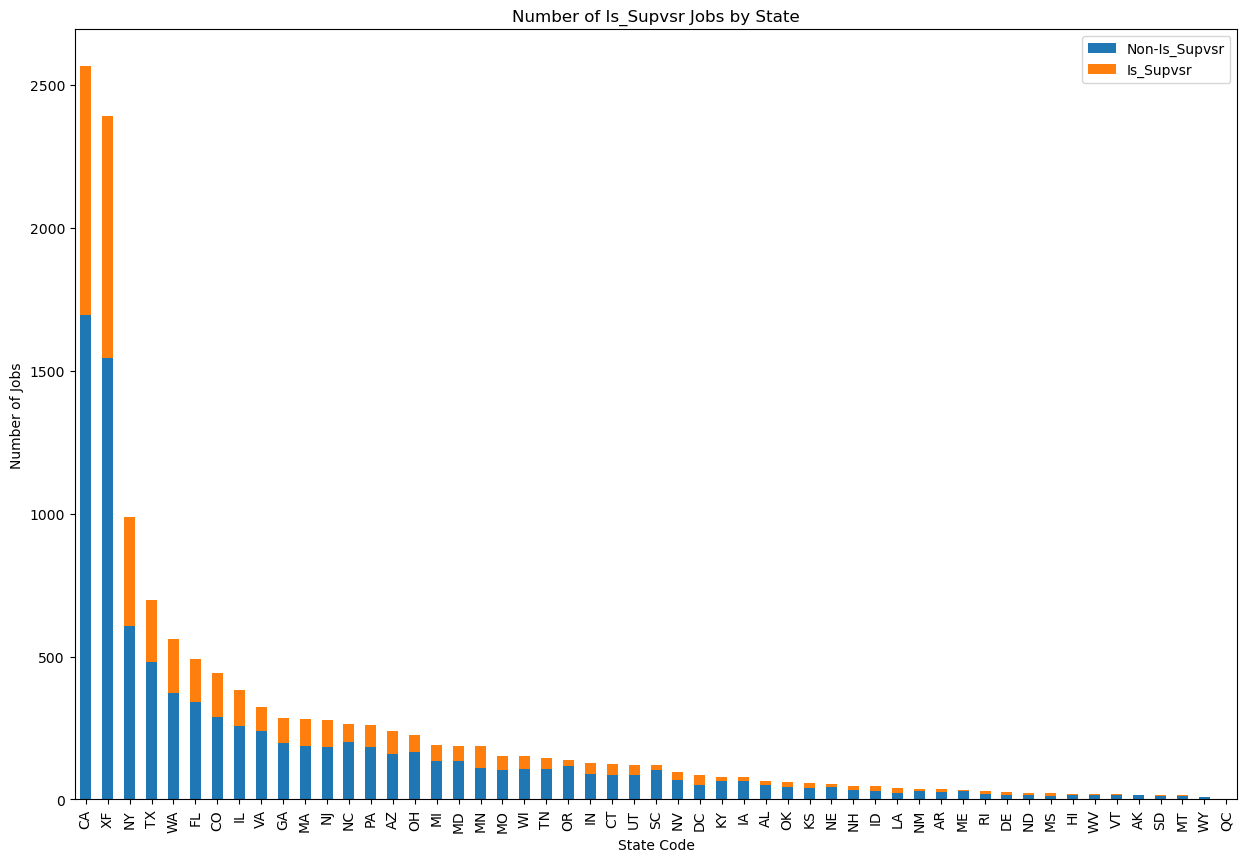

In [633]:
plot_remote_jobs_by_state(jobs_with_salary_df_filtered, bool_feature='Is_Supvsr')

We clearly see that the is more non-superivsion jobs than supervision jobs. So most likely that is not the reason for the spike.

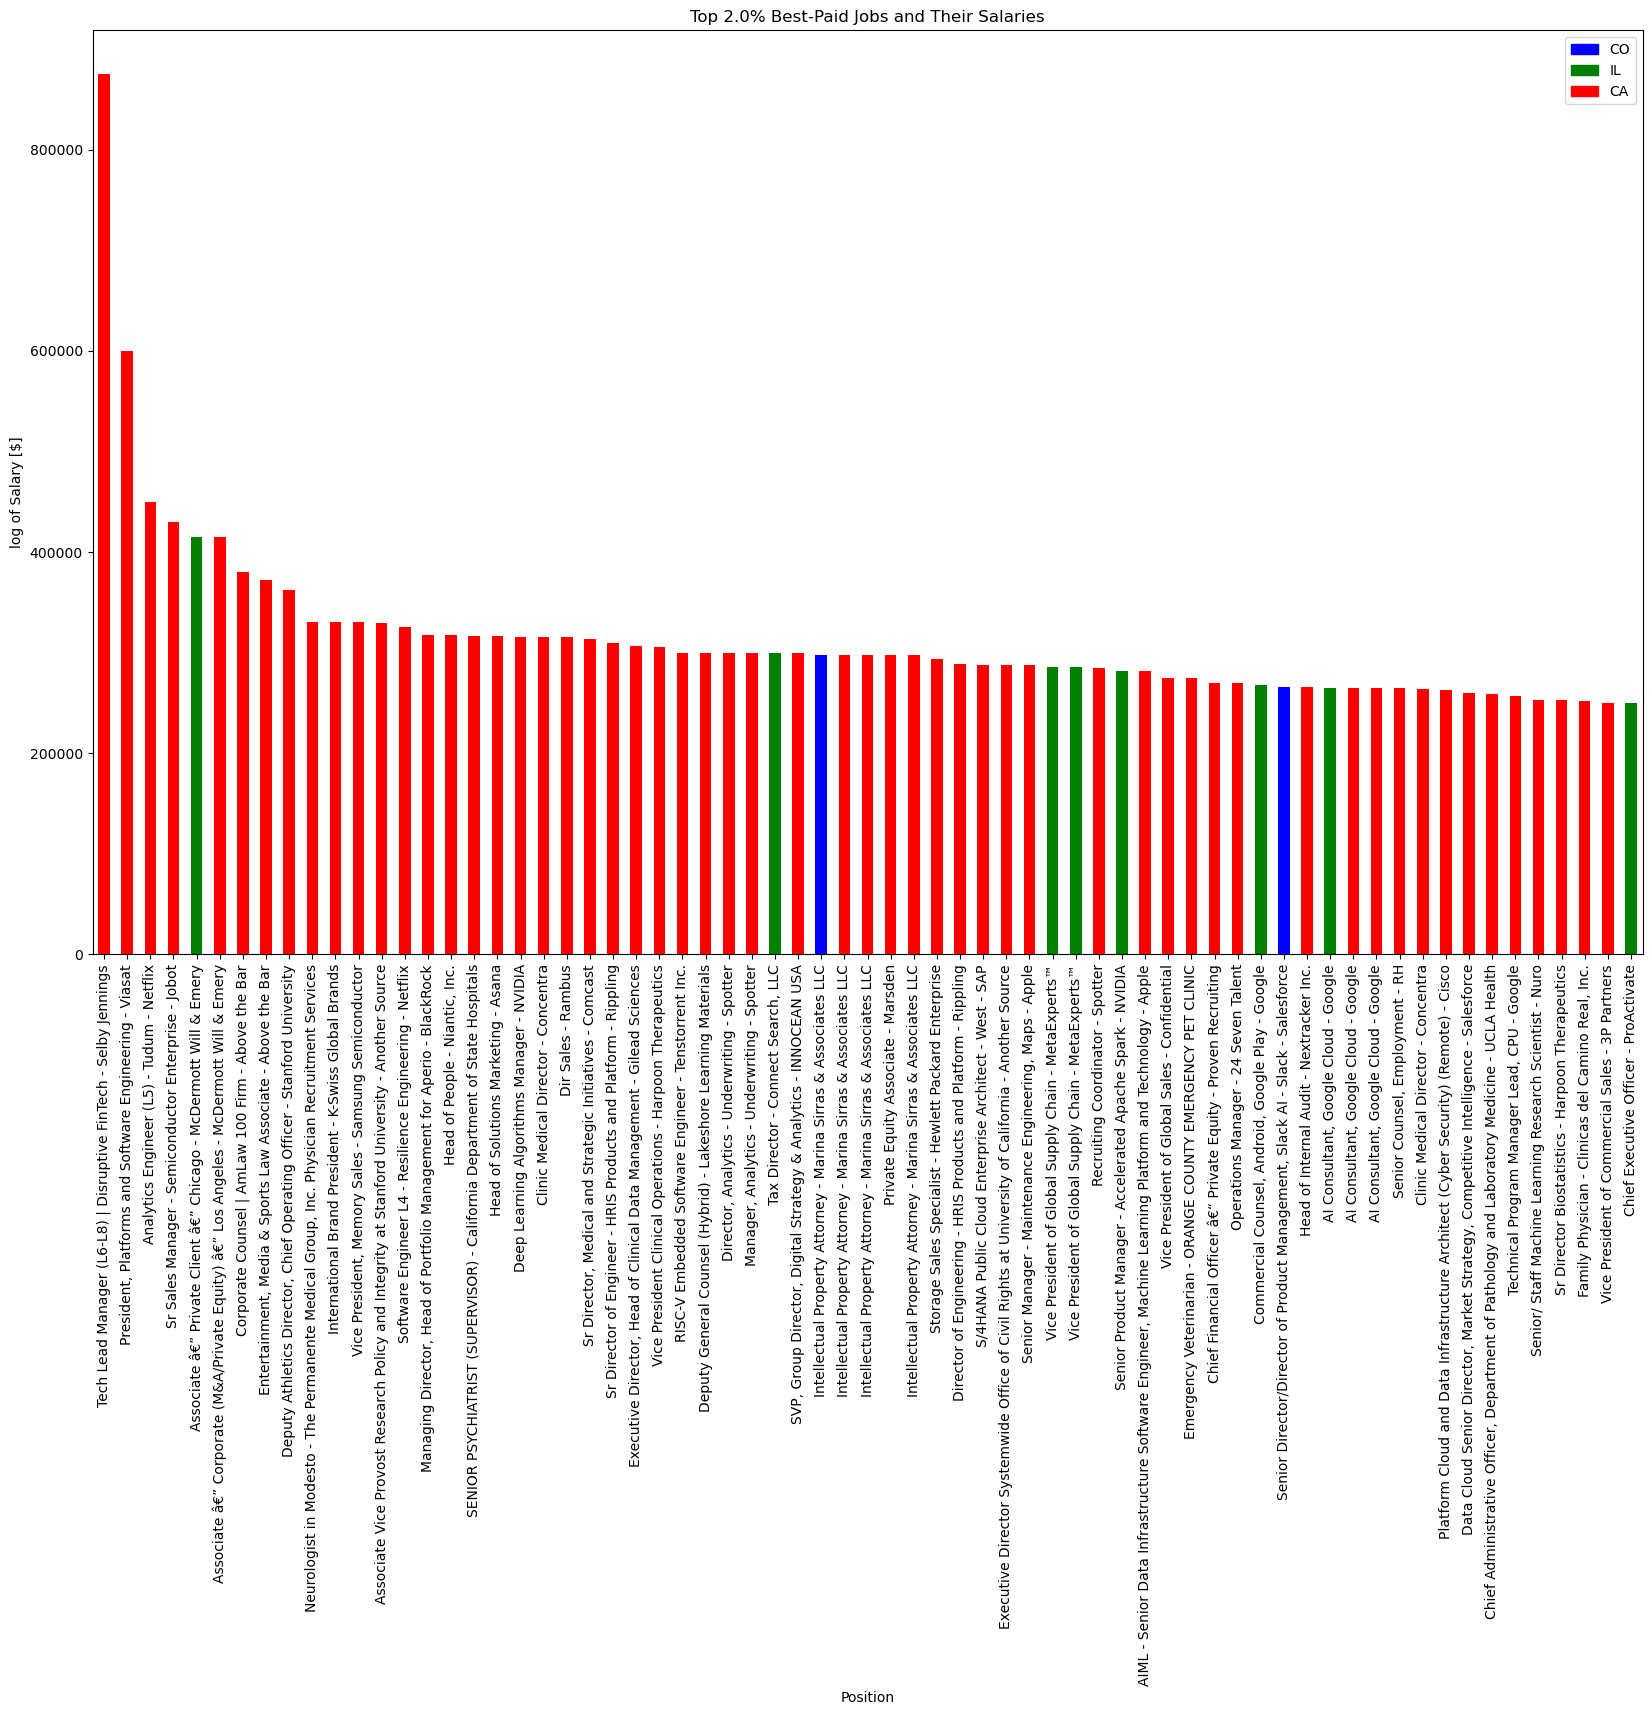

In [634]:
import matplotlib.patches as mpatches

percent = 0.02

filtered_jobs = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'].isin(['CO', 'IL', 'CA'])]

top_percent_jobs = filtered_jobs.nlargest(int(len(filtered_jobs) * percent), 'med_sal')

color_map = {'CO': 'blue', 'IL': 'green', 'CA': 'red'}
colors = top_percent_jobs['st_code'].map(color_map)

colors.fillna('gray', inplace=True)

top_percent_jobs['Position'] = top_percent_jobs['Job_Ttl'] + ' - ' + top_percent_jobs['Co_Nm']

top_percent_jobs[['Position', 'med_sal']].plot(kind='bar', x='Position', y='med_sal', figsize=(20, 12), color=colors)

patches = [mpatches.Patch(color=color, label=state) for state, color in color_map.items()]
plt.title('Top {}% Best-Paid Jobs and Their Salaries'.format(percent * 100))
plt.xlabel('Position')
plt.ylabel('log of Salary [$]')
plt.legend(handles=patches)
plt.show()

In [635]:
highest_salary_job = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'] == 'CO'].nlargest(1, 'med_sal')
print('Most paid job in CO:', highest_salary_job['Job_Ttl'].values[0])
print('Salary:', highest_salary_job['med_sal'].values[0])


highest_salary_job_CA = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'] == 'CA'].nlargest(1, 'med_sal')
print('Most paid job in CA:', highest_salary_job_CA['Job_Ttl'].values[0])
print('Salary:', highest_salary_job_CA['max_sal'].values[0])

highest_salary_job_IL = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'] == 'IL'].nlargest(1, 'med_sal')
print('Most paid job in IL:', highest_salary_job_IL['Job_Ttl'].values[0])
print('Salary:', highest_salary_job_IL['med_sal'].values[0])


Most paid job in CO: Intellectual Property Attorney
Salary: 297500.0
Most paid job in CA: Tech Lead Manager (L6-L8) | Disruptive FinTech
Salary: 1000000.0
Most paid job in IL: Associate â€” Private Client â€” Chicago
Salary: 415000.0


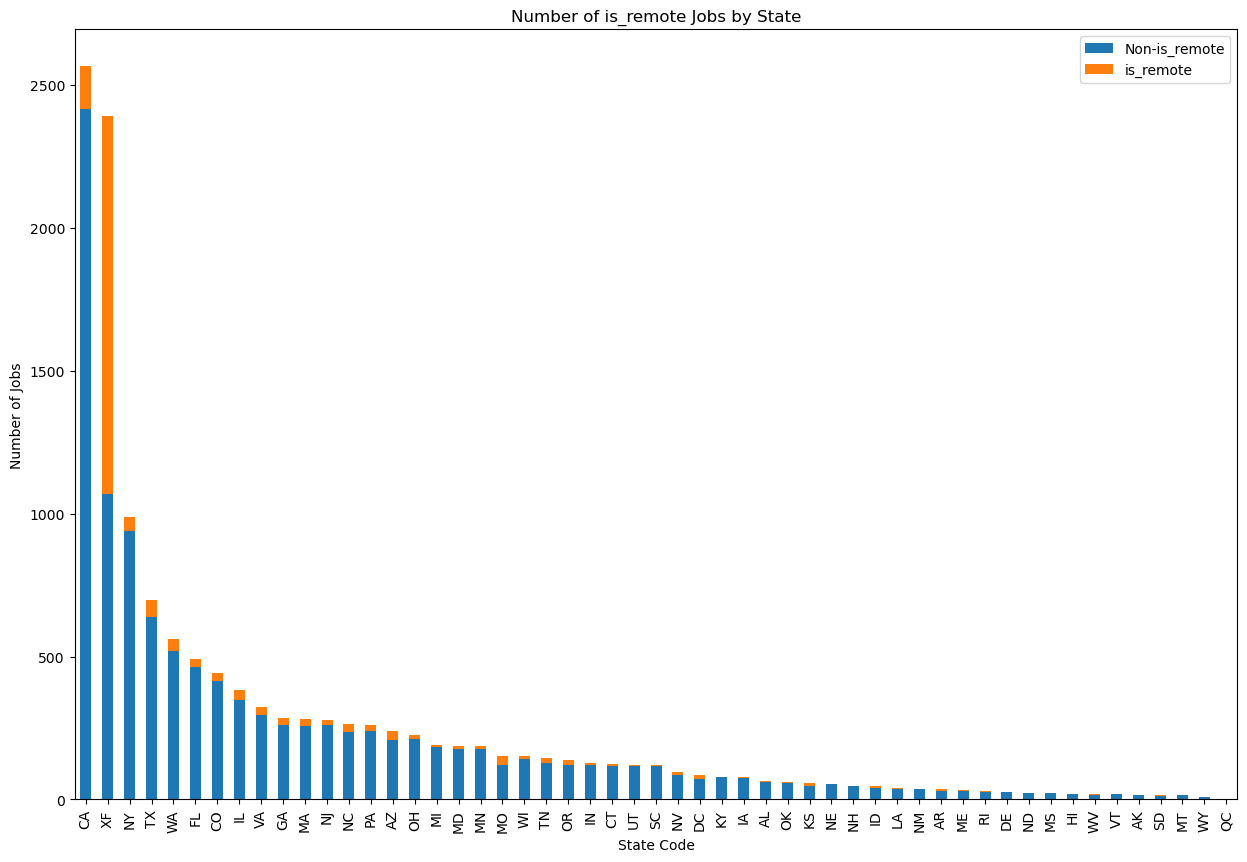

In [636]:
plot_remote_jobs_by_state(jobs_with_salary_df_filtered)

For state XF we see that most of the jobs are remote. Which is not the case for other states.

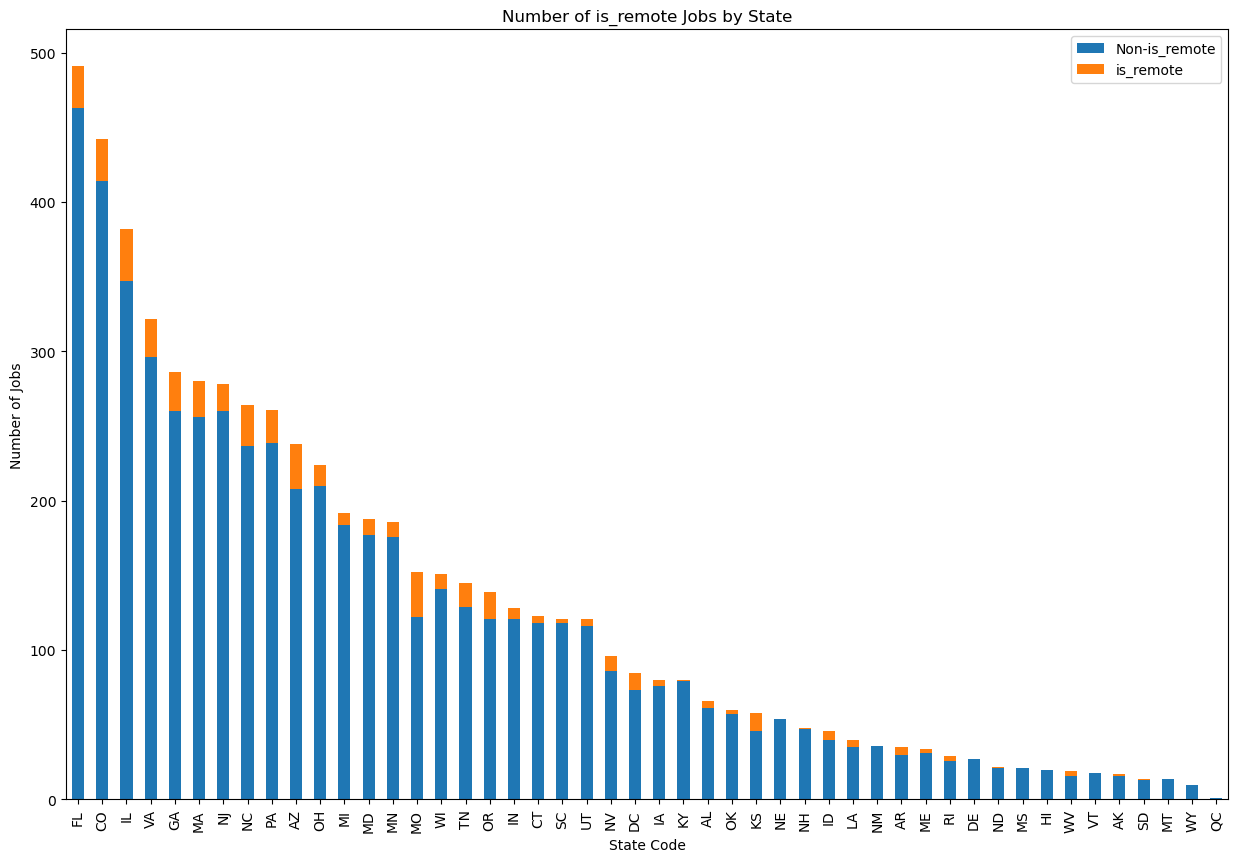

In [637]:
plot_remote_jobs_by_state(jobs_with_salary_df_filtered, treshold=500)

<Axes: >

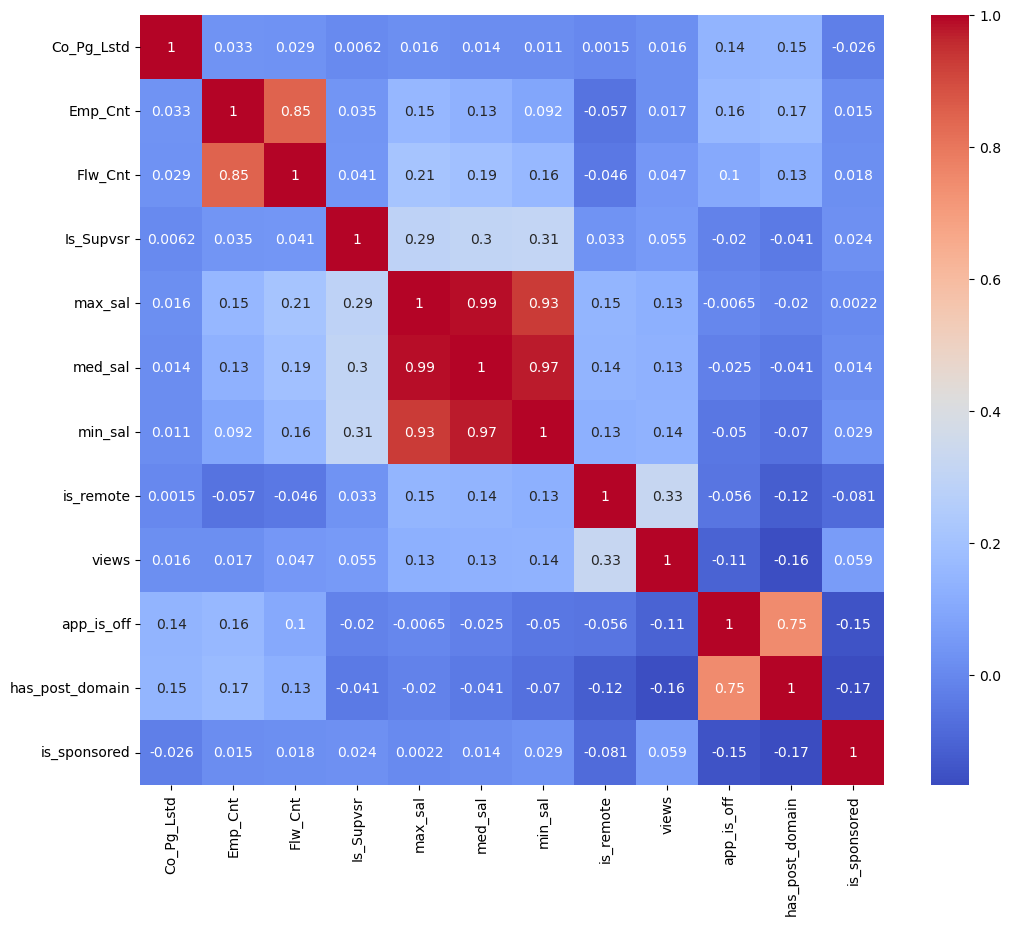

In [638]:
import seaborn as sns

numeric_columns = jobs_with_salary_df.select_dtypes(include=['int64', 'float64', 'bool'])
numeric_columns = numeric_columns.drop(columns=['py_lstd','base_comp'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


We will clean data from features that have almost no impact on the salary. 

In [639]:
jobs_with_salary_df = jobs_with_salary_df.drop(columns=['app_is_off', 'Flw_Cnt', 'Emp_Cnt', 'Co_Pg_Lstd', 'is_sponsored'])